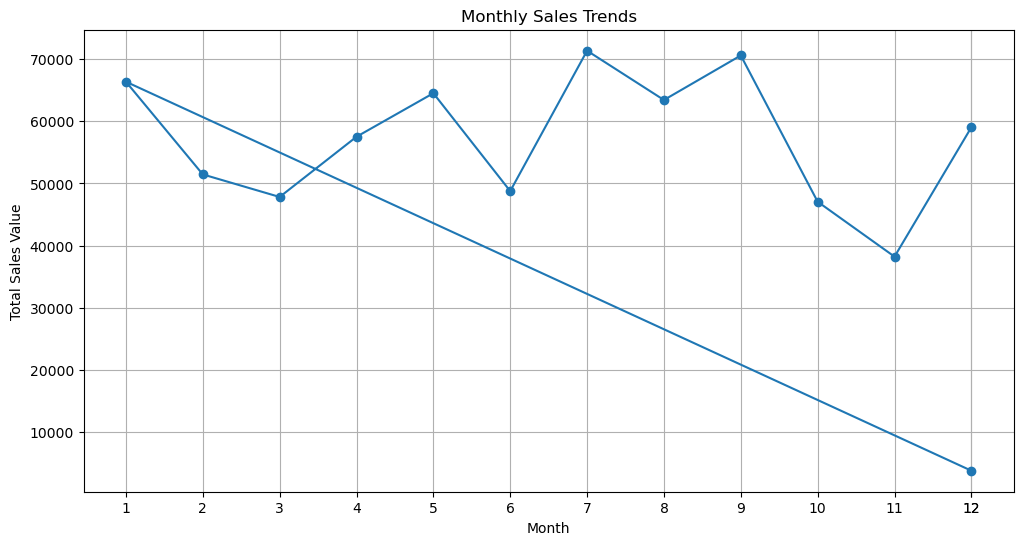

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'D:/Downloads/Transactions.csv')

# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract month and year for analysis
df['Month'] = df['TransactionDate'].dt.month
df['Year'] = df['TransactionDate'].dt.year

# Group by month and year to get total sales
monthly_sales = df.groupby(['Year', 'Month'])['TotalValue'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['TotalValue'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(monthly_sales['Month'])
plt.grid()
plt.show()

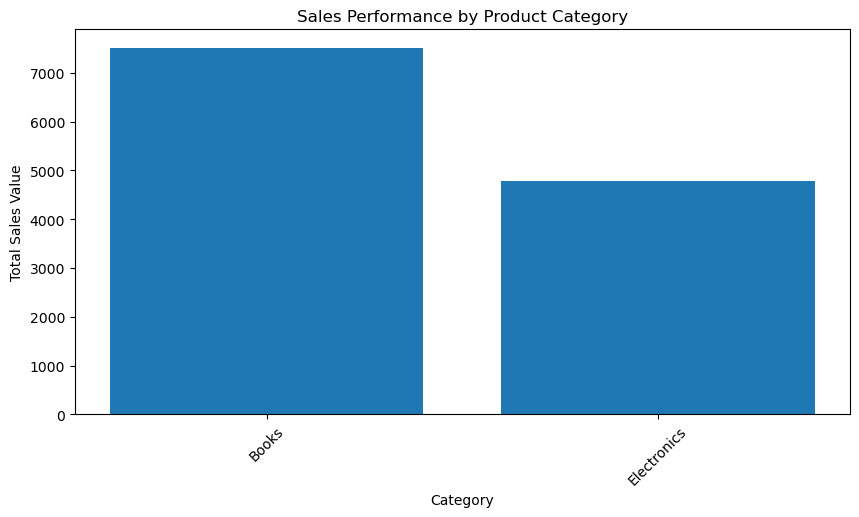

In [3]:
# Assuming 'ProductID' can be mapped to categories (this needs a mapping dictionary)
category_mapping = {
    'P067': 'Books',
    'P034': 'Electronics',
    # Add all product mappings here...
}

df['Category'] = df['ProductID'].map(category_mapping)

# Group by category to get sales performance
category_performance = df.groupby('Category')['TotalValue'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(category_performance['Category'], category_performance['TotalValue'])
plt.title('Sales Performance by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

In [4]:
# Identify high-value transactions (top 10 products by TotalValue)
high_value_products = df.groupby('ProductID')['TotalValue'].sum().nlargest(10).reset_index()

# Display high-value products
print(high_value_products)

  ProductID  TotalValue
0      P029    19513.80
1      P079    17946.91
2      P048    17905.20
3      P020    15060.92
4      P062    14592.24
5      P059    13947.20
6      P039    13778.88
7      P083    13671.60
8      P019    13487.95
9      P041    13232.12


In [5]:
# Analyze quantity sold per product to find popular items
popular_items = df.groupby('ProductID')['Quantity'].sum().reset_index().nlargest(10, 'Quantity')

# Display popular items
print(popular_items)

   ProductID  Quantity
53      P054        46
58      P059        46
28      P029        45
47      P048        43
56      P057        43
60      P061        43
78      P079        43
61      P062        39
19      P020        38
21      P022        38


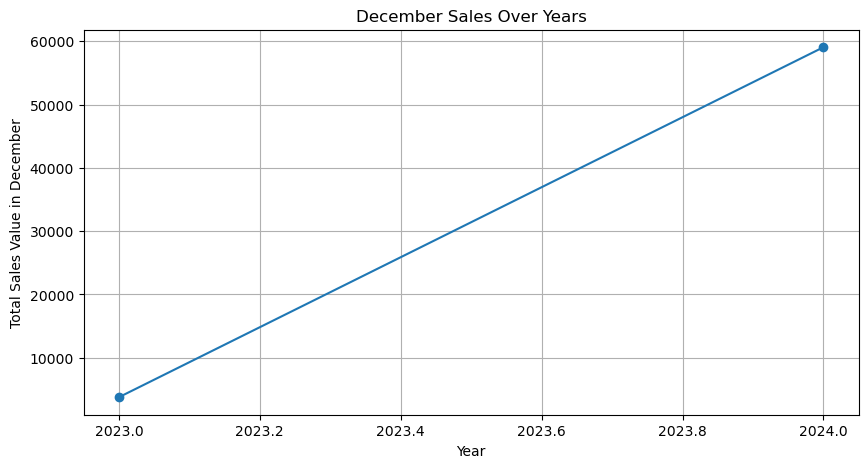

In [6]:
# Filter for December sales and analyze recovery pattern over years
december_sales = df[df['Month'] == 12].groupby('Year')['TotalValue'].sum().reset_index()

# Plotting December sales over years
plt.figure(figsize=(10, 5))
plt.plot(december_sales['Year'], december_sales['TotalValue'], marker='o')
plt.title('December Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales Value in December')
plt.grid()
plt.show()
